# Example 2D Truss Structure Analysis using Julia
A simple application of Julia Basic commands to simple truss structures analysis (based on https://github.com/jorgepz/trussStrEAM/blob/master/FEMTrusS.m).

**under construction**

In [83]:
# A few Auxiliar functions and packages included
include("funciones.jl")
#using Pkg
#Pkg.add("PyPlot")
using PyPlot
using LinearAlgebra

## Input
Constitutive, geometric and mesh parameters settings.

In [84]:
E  = 1 ;
A  = 1 ;
l  = 1 ;
lx = 1 ;
ly = 1 ;

Nodes   = [ 0 0; lx ly; 2*lx 0 ];
Conec   = [ 1 2; 2 3] ;
fixdofs = [ 1 2 5 6 ] ;

loadsVector = vec( zeros( 2*nnodes,1));
loadsVector[4] = -0.2;

A few auxiliar computations and prints of info. 

In [85]:
nelems = size(Conec)[1] ;
nnodes = size(Nodes)[1] ;

println( "The mesh is formed by: ",nelems, " elements and ", nnodes, " nodes.")

totdofs = 1:(2*nnodes) ;
fredofs = setdiff( totdofs, fixdofs );
lengths = sqrt.( sum( ( Nodes[Conec[:,2],:] - Nodes[Conec[:,1],:] ).^2, dims = 2 ) )
Angles  = atan.( Nodes[ Conec[:,2],2] - Nodes[ Conec[:,1],2] , Nodes[ Conec[:,2],1] - Nodes[ Conec[:,1],1] )

println("The vector of the free degrees of freedom is: ", fredofs)
println("The angles are: ", Angles, "  and the lengths are: ", lengths)

The mesh is formed by: 2 elements and 3 nodes.
The vector of the free degrees of freedom is: [3, 4]
The angles are: [0.7853981633974483, -0.7853981633974483]  and the lengths are: [1.4142135623730951; 1.4142135623730951]


A plot of the reference (undeformed) structure.

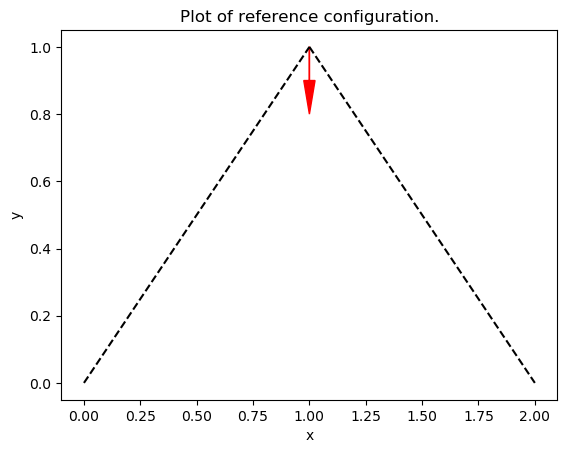

PyObject Text(0.5, 1, 'Plot of reference configuration.')

In [86]:
for i in 1:nelems
  plot(Nodes[Conec[i,:],1],Nodes[Conec[i,:],2], color="black", linewidth=1.5, linestyle="--")
end
sf = 0.5
for i in 1:nnodes
  if norm(loadsVector[(2*i-1):(2*i)])>0
    arrow(Nodes[i,1], Nodes[i,2], loadsVector[2*i-1], loadsVector[2*i]*sf, color="red", head_width=0.05, head_length=0.1)
  end
end
xlabel("x")
ylabel("y")
title("Plot of reference configuration.")


## Analysis
System matrix and independent term vector assembly.

In [87]:
using SparseArrays
KG    = spzeros(2*nnodes, 2*nnodes)
Kbase = [ 1 0 -1 0 ; 0 0 0 0; -1 0 1 0; 0 0 0 0]

for i in 1:nelems
  elemdofs = nodes2dofs(Conec[i,:], 2)
  println("elemento: ",i, "  nodos:   ", Conec[i,:], "  dofs: ", elemdofs)
  ang = Angles[i];
  ca = cos(ang);   sa = sin(ang);
  R = [ ca -sa 0 0; sa  ca 0 0 ; 0 0 ca -sa ; 0  0 sa ca ];

  KG[elemdofs, elemdofs ] += E*A/lengths[i] * R * Kbase * transpose( R ) ;
end
FG = loadsVector;

elemento: 1  nodos:   [1, 2]  dofs: [1, 2, 3, 4]
elemento: 2  nodos:   [2, 3]  dofs: [3, 4, 5, 6]


Boundary conditions and system resolution.

In [88]:
Kliblib = KG[fredofs,fredofs ];
print(Array(Kliblib))
Flib    = FG[fredofs];

u = Kliblib \ Flib ;
UG = vec( zeros( 2*nnodes,1));
UG[fredofs] = u;
println(" reduced displacements vector: ", u)
println("llamo a vecu2matu: ")
matu = vecu2matu(UG)
println( matu)
NodesDef = Nodes .+ matu

[0.7071067811865476 0.0; 0.0 0.7071067811865474] reduced displacements vector: [0.0, -0.2828427124746191]
llamo a vecu2matu: 
3.0
[0.0 0.0; 0.0 -0.2828427124746191; 0.0 0.0]


3×2 Array{Float64,2}:
 0.0  0.0     
 1.0  0.717157
 2.0  0.0     

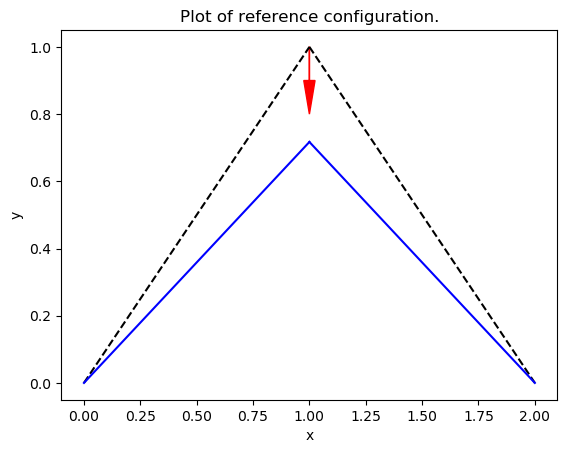

PyObject Text(0.5, 1, 'Plot of reference configuration.')

In [89]:
for i in 1:nelems
  plot(Nodes[Conec[i,:],1],Nodes[Conec[i,:],2], color="black", linewidth=1.5, linestyle="--")
end
for i in 1:nelems
  plot(NodesDef[Conec[i,:],1],NodesDef[Conec[i,:],2], color="blue", linewidth=1.5, linestyle="-")
end
sf = 0.5
for i in 1:nnodes
  if norm(loadsVector[(2*i-1):(2*i)])>0
    arrow(Nodes[i,1], Nodes[i,2], loadsVector[2*i-1], loadsVector[2*i]*sf, color="red", head_width=0.05, head_length=0.1)
  end
end
xlabel("x")
ylabel("y")
title("Plot of reference configuration.")
